# 引言

高效处理数据的Python工具，基本都需要完成以下几个大类的任务

任务 | 说明
---|---
与外界交互 | 读写各种各样的文件格式和数据库
准备 | 对数据进行清理、修整、整合、规范化、重塑、切片、切块、变形等处理以便进行分析
转换 | 对数据集做一些数学和统计运算以产生新的数据集
建模和分析 | 将数据跟统计模型、机器学习算法或其他工具联合起来
展示 | 创建交互式的或静态的图片或文字摘要

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 来自 bit.ly 的 usa.gov 数据

2011 URL 短址服务 bit.ly 与美国政府网站 usa.gov 合作，提供一份生成 .gov 或 .mil 端链接的用户那里收集来的匿名数据。

In [2]:
!head -1 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }


In [3]:
import json

# 读取 JSON 字串，转换成 Python 字典对象
records = [json.loads(line) for line in open('ch02/usagov_bitly_data2012-03-16-1331923249.txt')]
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [4]:
# 单引号前面的 u 表示 unicode
records[0]['tz']

u'America/New_York'

### 用纯 Python 代码对时区进行计数

In [5]:
# time_zones = [rec['tz'] for rec in records]

# 可在列表推导式末尾加上一个 if 过滤缺失值
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [6]:
# 计算时区出现的次数，方法一
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']

1251

In [7]:
# 计算时区出现的次数，方法二
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 所有值均被初始化为 0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts2(time_zones)
counts['America/New_York'] 

1251

In [8]:
# 计算前10位时区，及其计数值
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [9]:
# 使用 Collection.Counter 简化工作
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### 用 Pandas 对时区进行计算

In [11]:
from pandas import DataFrame, Series

import pandas as pd
import numpy as np

In [12]:
frame = DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [13]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [14]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [15]:
# 处理缺失值
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

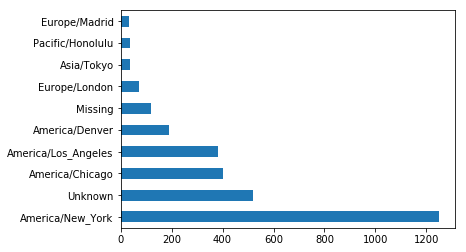

In [16]:
# 画出水平条形图
tz_counts[:10].plot(kind='barh', rot=0)

In [17]:
# 查看第一笔记录
frame.ix[0]

_heartbeat_                                                  NaN
a              Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
al                                                en-US,en;q=0.8
c                                                             US
cy                                                       Danvers
g                                                         A6qOVH
gr                                                            MA
h                                                         wfLQtf
hc                                                   1.33182e+09
hh                                                     1.usa.gov
kw                                                           NaN
l                                                        orofrog
ll                                       [42.576698, -70.954903]
nk                                                             1
r              http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...
t                        

In [18]:
# a 字段包含浏览器、设备、应用程序相关信息
frame['a'][1], frame['a'][50], frame['a'][51] 

(u'GoogleMaps/RochesterNY',
 u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2',
 u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1')

In [19]:
# 抽取浏览器信息
results = Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [20]:
# 找出OS信息
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [21]:
# 根据时区与操作系统列表对数据进行分组
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [22]:
# 对最常出现的市区间接排序，得到间接索引数组
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [23]:
# 选取最常出现的时区
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


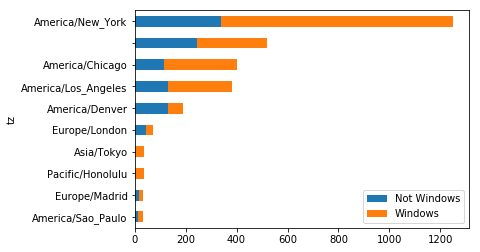

In [24]:
# 生成长条图
count_subset.plot(kind='barh', stacked=True)

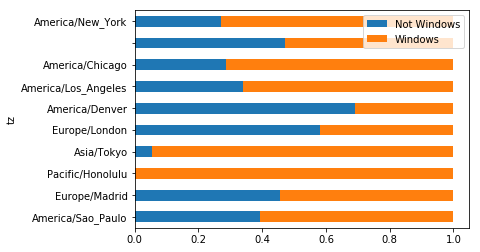

In [25]:
# 将各行规范化，重新绘图
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M Data Set

In [26]:
import pandas as pd

In [27]:
!head ch02/movielens/users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614
10::F::35::1::95370


In [28]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat',
                      sep='::',
                      header=None,
                      names=unames,
                      engine='python')
users[:5]
# 注意，其中的年龄、职业是以编码形式给出

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [29]:
rname = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat',
                        sep='::',
                        header=None,
                        names=rname,
                        engine='python')
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [30]:
mname = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat',
                       sep='::',
                       header=None,
                       names=mname,
                       engine='python')
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


假设想根据性别、年龄计算某部电影的平均得分。如果将所有数据都合并到一个表的话，问题就简单多了

In [31]:
data = pd.merge(pd.merge(ratings, users), movies)
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [32]:
# 按性别计算每部电影平均得分
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [33]:
# 按照电影名取得评分数据
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [34]:
# 取得评分数据大于250条的电影名称
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [35]:
# 根据 active_titles 过滤平均评分
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [36]:
# 为了了解女性观众最喜欢的电影，对 F 列降序排序
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

假设想找出男性观众与女性观众分歧最大的电影

In [37]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sorted_by_diff = mean_ratings.sort_values(by='diff')

In [38]:
# 取出前几部电影
sorted_by_diff[:5]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [39]:
# 堆排序结果反序，取出前几部电影
sorted_by_diff[::-1][:5]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [40]:
# 找出评分分歧最大的电影
ratings_std_by_title = data.groupby('title')['rating'].std()

# 根据 active_titles 进行过滤
ratings_std_by_title = ratings_std_by_title.ix[active_titles]

# 对 std 进行降序排序
ratings_std_by_title.sort_values(ascending=False)[:5]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64

## US Baby Names 1880-2010

In [41]:
!head -5 ch02/names/yob1880.txt

In [42]:
import pandas as pd

In [43]:
names1880 = pd.read_csv('ch02/names/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [44]:
# 计算当年出生男女人数
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [45]:
# 有效统计年度
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 将所有数据整合到单个 DataFrame
names = pd.concat(pieces, ignore_index=True)

len(names)

1690784

- concat 默认将多个 DataFrame 组合到一起
- 指定 ignore_index=True，不希望保留 read_csv 返回的原始行号

In [46]:
total_births = names.pivot_table('births', 
                                 index='year', 
                                 columns='sex', 
                                 aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [47]:
# 计算指定名字的婴儿相对于总出生的比例
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

# 先按照year和sex分组，再将新列加到各组上
names = names.groupby(['year', 'sex']).apply(add_prop)

In [48]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [49]:
# 有效性检查：验证所有分组的prop总和为1
# 因为使用浮点数，所以使用 np.allclose 检查分组综合是否足够接近 1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [50]:
# 每对 sex/year 组合的前 1000 个名字
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [51]:
# 手动方式
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### Analyzing Naming Trends

In [52]:
# 将前1000名名字分成男女
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [53]:
# 生成一张按 year 和 name 统计的总出生数透视图
total_births = top1000.pivot_table(values='births',
                                   index='year', 
                                   columns='name')
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x123cb6890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b914d90>], dtype=object)

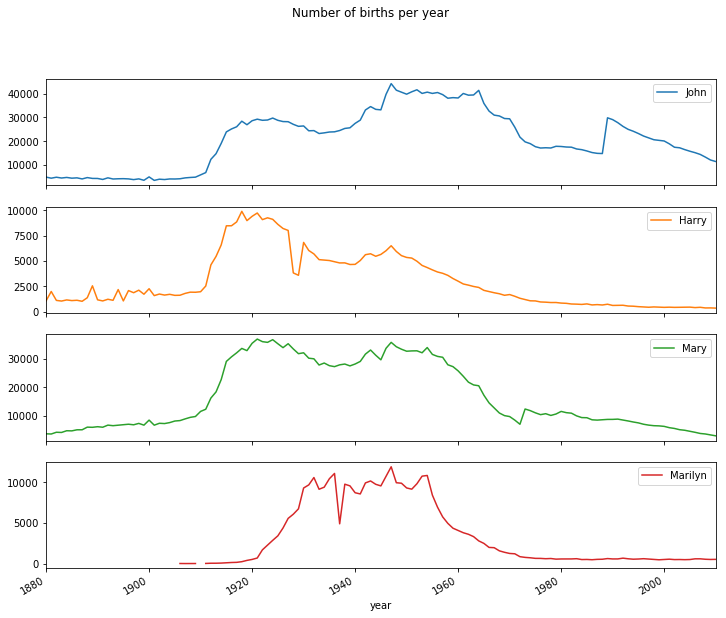

In [54]:
# 利用 DataFrame plot 方法绘制几个名字的曲线图
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True,
            figsize=(12,10),
            grid=False,
            title='Number of births per year')

#### Measuring the increase in naming diversity

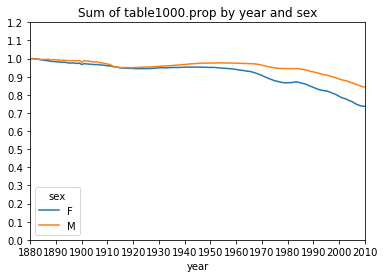

In [55]:
# 生成一张按 year 和 sex 统计的前1000项占比透视图
table = top1000.pivot_table('prop',
                            index='year',
                            columns='sex',
                            aggfunc='sum')

# 前1000项的比例（逐年下降，表示名字多样性出现增长）
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13),
           xticks=range(1880, 2020, 10))

In [56]:
# 计算出生人数前50%的不同名字的数量 （2010年）
df = boys[boys.year == 2010]

In [57]:
# 计算prop的累积和
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [58]:
# 通过 searchsorted 找出 0.5 应该被插入在哪个位置才能保证不破坏顺序
prop_cumsum.searchsorted(0.5)[0]

116

In [59]:
# 计算出 1990 年 50% 应该被插入在哪个位置
df = boys[boys.year == 1900]
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1990.searchsorted(0.5)[0]+1 # 索引从 0 开始，所以结果要加 1

25

In [60]:
# 按照上面逻辑，写出通用的计算方式
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1

# 按 year 和 sex 统计前50%包含多少名字
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


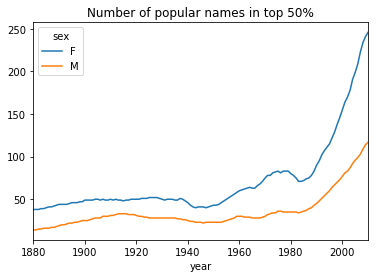

In [61]:
# 从图看出，女孩名字多样性比男孩高，两者随时间变化越来越高
diversity.plot(title='Number of popular names in top 50%')

#### The “Last letter” Revolution

In [62]:
# 从 name 取出最后一个字母
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

# 按 sex、year  产生“最后一个字母”占比透视图
table = names.pivot_table('births',
                         index=last_letters,
                         columns=['sex', 'year'],
                         aggfunc=sum)

In [63]:
# 观察 1910, 1960, 2010
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [64]:
# 计算“最后一个字母”占比
letter_prop = subtable / subtable.sum().astype(float)

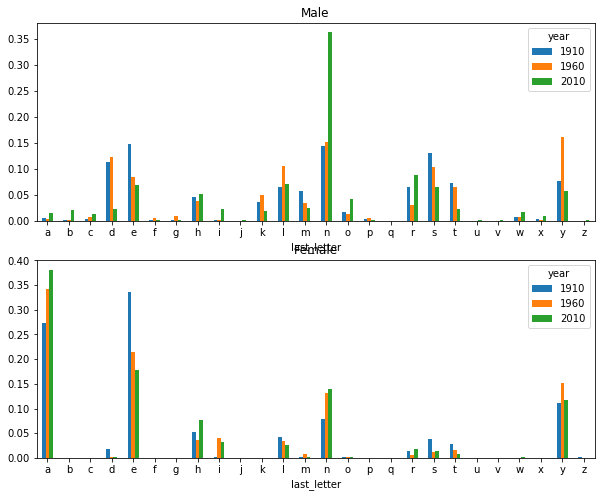

In [65]:
import matplotlib.pyplot as plt

# 画出男女在 1910, 1960, 2010 三个年份，“最后一个字母”占比长条图
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [66]:
# 按照年份，找出男孩“最后一个字母”为 d, n, y 的比例
dny_ts = letter_prop.ix[['d','n','y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1910,0.113858,0.143415,0.077349
1960,0.122908,0.152522,0.160987
2010,0.023387,0.362771,0.058168


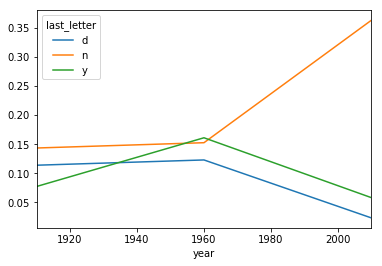

In [67]:
# 画出男孩“最后一个字母”为 d, n, y 随着时间的比例变化
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [68]:
# 找出所有年份名字的集合
all_names = top1000.name.unique()

# 找出以“lesl”开头的一组名字
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [69]:
# 使用上面的索引数组过滤名字
filtered = top1000[top1000.name.isin(lesley_like)]

# 按照名字分组计算出生数
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [70]:
# 按照 year、sex 进行聚合，产生频率图
table = filtered.pivot_table('births',
                             index='year',
                             columns='sex',
                             aggfunc=sum)

# 按照年度进行规范化处理，产生占比透视图
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


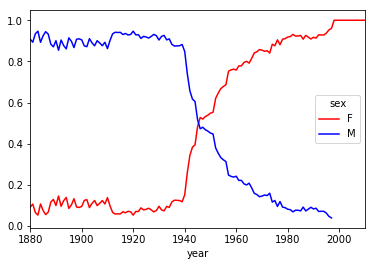

In [71]:
# 画出分性别的年度曲线图
table.plot(style={'M': 'b-', 'F': 'r-'})